In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv')
print(df)
df.info()
df.describe()


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_missing:
    df.replace({col:pd.NA})

df.fillna(df.median(), inplace=True)


In [16]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


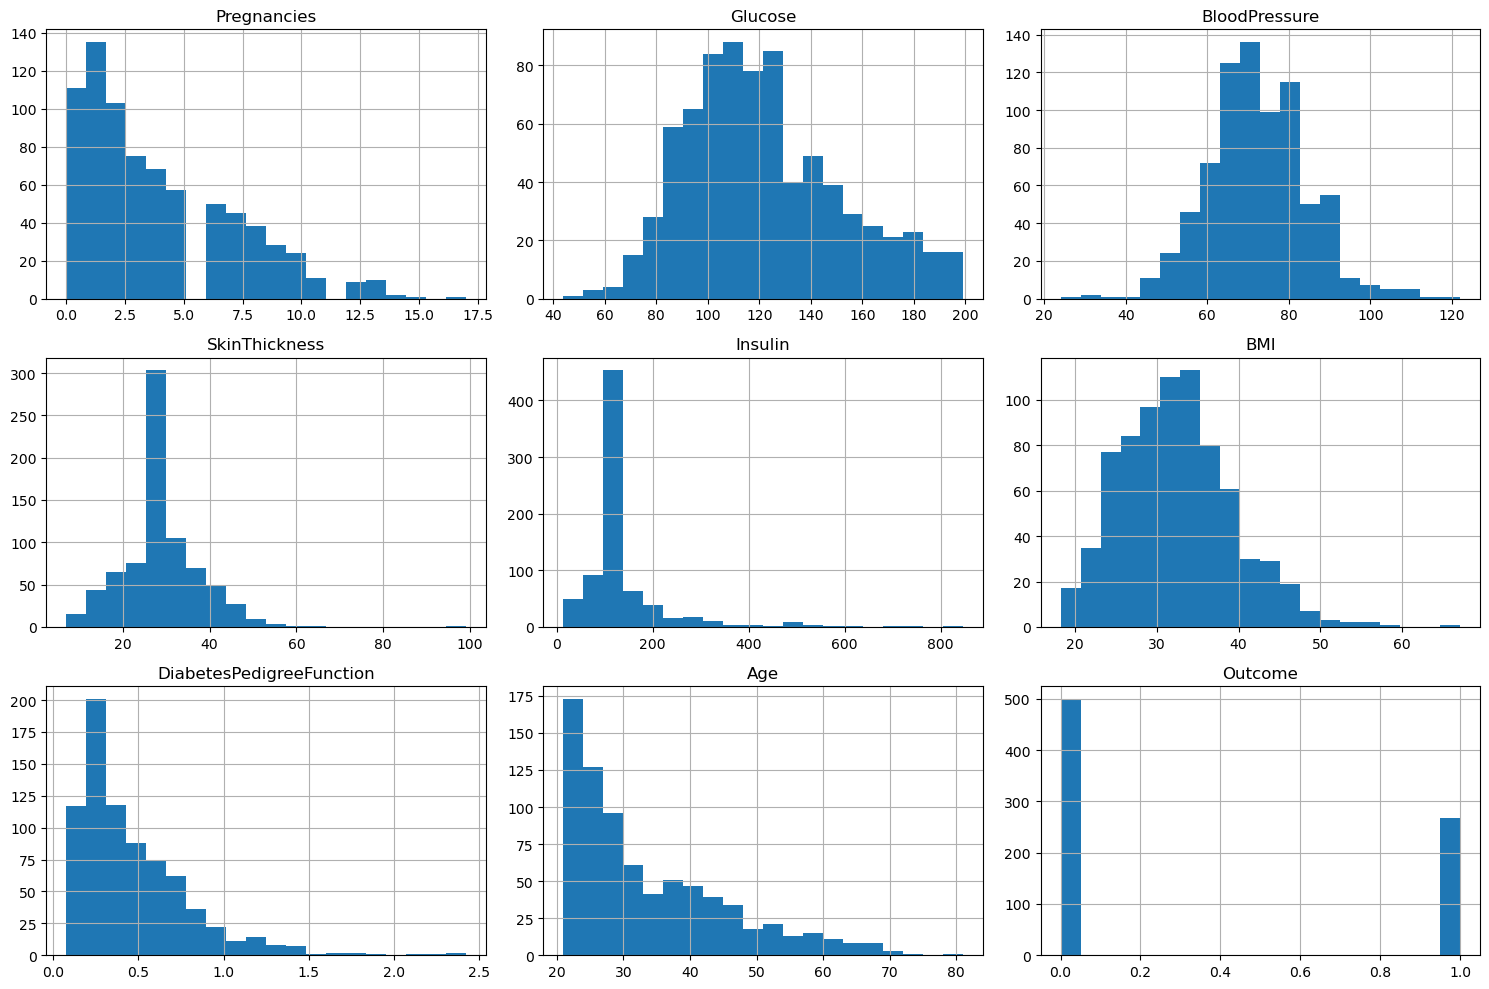

In [20]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()


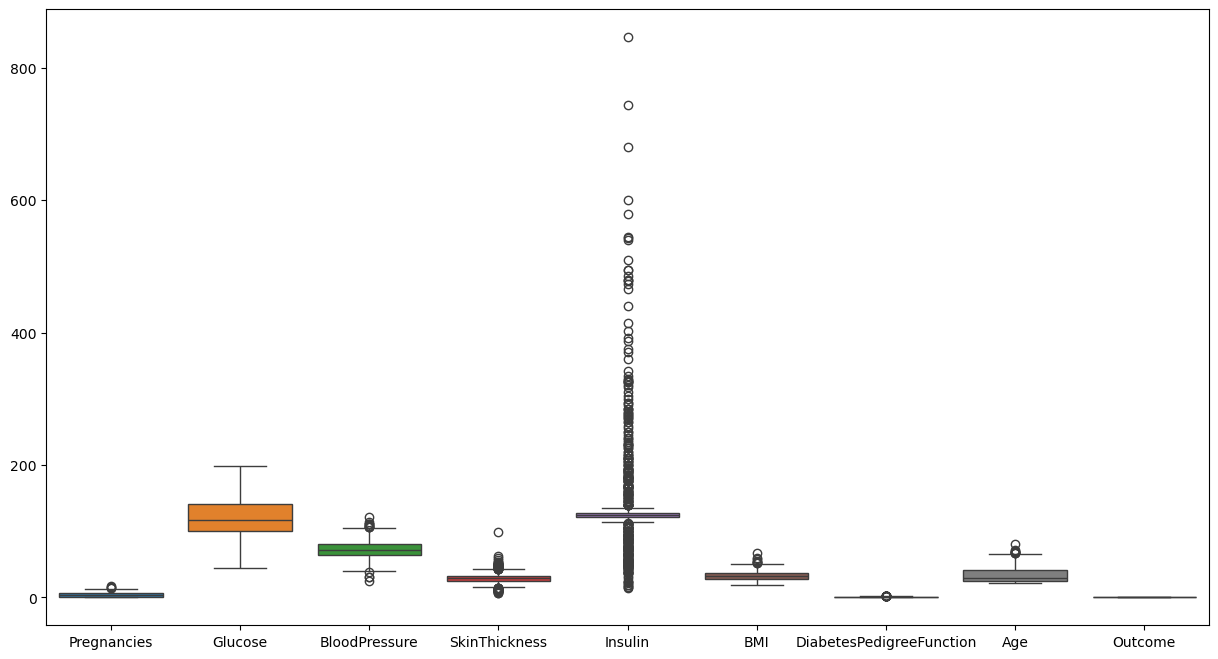

In [24]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.show()



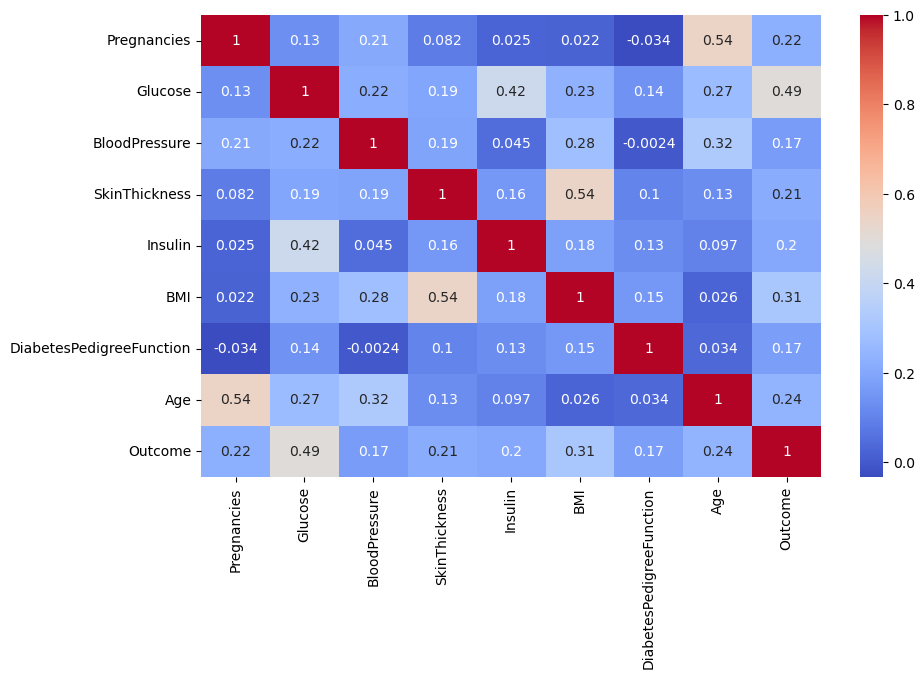

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


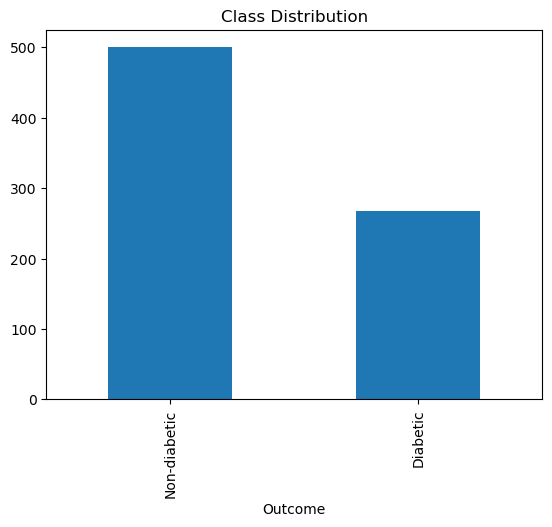

In [28]:
df['Outcome'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['Non-diabetic', 'Diabetic'])
plt.title('Class Distribution')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42)
}


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True)
}



In [52]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)



In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print('Best Parameters:', grid.best_params_)
best_rf = grid.best_estimator_


Best Parameters: {'max_depth': 7, 'n_estimators': 200}


In [56]:
importances = best_rf.feature_importances_
feature_names = df.columns[:-1]
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importances)


Glucose                     0.312521
BMI                         0.169373
Age                         0.119826
DiabetesPedigreeFunction    0.102930
Insulin                     0.099270
Pregnancies                 0.069983
BloodPressure               0.065203
SkinThickness               0.060894
dtype: float64


In [58]:
from sklearn.feature_selection import RFE

rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=3)
rfe.fit(X_train, y_train)
print("Selected features:", X.columns[rfe.support_])


Selected features: Index(['Pregnancies', 'Glucose', 'BMI'], dtype='object')


Glucose, BMI, and Age generally have the highest predictive power for diabetes prediction.
Support Vector Machine and Random Forest typically produce the highest accuracy and F1-scores.
Scaling improves KNN and SVM performance. Removing outliers can reduce noise, leading to slightly better results for sensitive models.
Using only top 3-4 features may reduce accuracy slightly, but often these features capture most predictive information. Performance drop is model-dependent
Tuning can significantly boost accuracy and reduce overfitting, especially for Random Forests and SVMs.